# Task: 
Create the Python program which:
1) Reads the data from data source - the file from Web or the data from Web scrapping.
2) Data must be processed in Python using Pandas.
3) Do the necessary data transformations in Pandas.
4) Visualize the data. 
5) Save the data results (tables and plots) in the files (JSON and CSV) and as Markdown HTML/PDF file in Jupyter.
5) Create database using SQL (MySQL) and store/update the data there.

## Processing data in Python using Pandas

### Importing library

In [1]:
import pandas as pd

### Loading a dataset using Pandas

In [2]:
data = pd.read_csv("hotels_list.csv")

In [3]:
pd.set_option('display.max_rows',300)

In [4]:
data

,name,price,score,reviews amount,review
0,Grand Baltic Dunes,€ 77,8.8,"4,865",Excellent
1,Senoji Palanga,€ 44,9.6,497,Exceptional
2,Kerpė Hotel & SPA,€ 77,8.9,"1,275",Excellent
3,Atostogų Parkas Hotel,€ 91,8.9,"2,888",Excellent
4,Žilvinas Hotel,€ 106,9.1,675,Wonderful
5,Amberton Green Apartments Palanga,€ 68,9.0,"3,249",Wonderful
6,Senoji Hansa Hotel,€ 87,9.2,"1,308",Wonderful
7,Hotel Palanga Camping Compensa,€ 59,8.9,"1,322",Excellent
8,Palangos Vetra,€ 78,8.9,"1,758",Excellent
9,A.V. namai,€ 42,9.1,630,Wonderful


### Cleaning data

In [5]:
# Formating all float values
pd.options.display.float_format = '{:,.1f}'.format

In [6]:
# Checking data type of score column values
data['score'].apply(type).value_counts()

score
<class 'str'>    221
Name: count, dtype: int64

In [7]:
# Removing 'E' values and replacing column type to float
data['score'] = data['score'].replace("E","",regex=True).astype('float')

In [8]:
# Checking data type of price column
data['price'].apply(type).value_counts()

price
<class 'str'>    221
Name: count, dtype: int64

In [9]:
# Removing currency signs (€) and replacing column type to float
data['price'] = data['price'].replace("€","",regex=True).astype('float')

In [10]:
# Checking data type of reviews amount column
data['reviews amount'].apply(type).value_counts()

reviews amount
<class 'str'>    221
Name: count, dtype: int64

In [11]:
# Removing commas and replacing column type to int
data['reviews amount'] = data['reviews amount'].replace(",","",regex=True).astype('int')

In [12]:
# Checking data type of reviews column
data['review'].apply(type).value_counts()

review
<class 'str'>    221
Name: count, dtype: int64

In [13]:
# Replacing 'xceptional' strings with 'Exceptional' in review score column
data['review'].replace("xceptional", "Exceptional", inplace=True)

In [14]:
# Disabling SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [15]:
# Converting all review column values with review score less than 7.0 to 'Fair' and with less than 6.0 to 'Poor'
counter = 0
for row in data['score']:
    if row < 6:
        data['review'][counter] = "Poor"
    elif row >= 6 and row < 7:
        data['review'][counter] = "Fair"
    counter += 1

### Renaming columns

In [16]:
data.rename(columns = {'price':'price(eur)','reviews amount':'reviews_amount'}, inplace = True)
data

,name,price(eur),score,reviews_amount,review
0,Grand Baltic Dunes,77.0,8.8,4865,Excellent
1,Senoji Palanga,44.0,9.6,497,Exceptional
2,Kerpė Hotel & SPA,77.0,8.9,1275,Excellent
3,Atostogų Parkas Hotel,91.0,8.9,2888,Excellent
4,Žilvinas Hotel,106.0,9.1,675,Wonderful
5,Amberton Green Apartments Palanga,68.0,9.0,3249,Wonderful
6,Senoji Hansa Hotel,87.0,9.2,1308,Wonderful
7,Hotel Palanga Camping Compensa,59.0,8.9,1322,Excellent
8,Palangos Vetra,78.0,8.9,1758,Excellent
9,A.V. namai,42.0,9.1,630,Wonderful


## Calculating summary statistics for a dataset: mean, median, and standard deviation ##

In [17]:
# Mean value of a price column
data['price(eur)'].mean()

80.80995475113122

In [18]:
# Median value of a price column
data['price(eur)'].median()

67.0

In [19]:
# Standard deviation of a price column
data['price(eur)'].std()

45.38301735328814

## Sorting values in descending score and ascending price order

In [20]:
best_cheapest_hotels = data.sort_values(by=['score','price(eur)'], ascending = [False,True], ignore_index = True)
best_cheapest_hotels.iloc[:5]

,name,price(eur),score,reviews_amount,review
0,JANINA,53.0,10.0,1,Exceptional
1,"Namelis ,,Gilė”",58.0,10.0,12,Exceptional
2,NeriesApartment Two Bedrooms Resort Suite iN C...,85.0,10.0,1,Exceptional
3,Mėlyna jūra apartamentai,111.0,10.0,2,Exceptional
4,Modern Loft Garage - Mano Jura,145.0,10.0,2,Exceptional


## Visualizing data using Matplotlib

### Importing libraries

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Adding prices to coresponding lists according to reviews

reviews = {'Exceptional':[],'Wonderful':[],'Excellent':[],
           'Very Good':[],'Good':[],'Fair':[],'Poor':[]}
count = 0
for row in data['review']:
    match row:
        case 'Exceptional':
            reviews['Exceptional'].append(data['price(eur)'][count])            
        case 'Wonderful':
            reviews['Wonderful'].append(data['price(eur)'][count])
        case 'Excellent':
            reviews['Excellent'].append(data['price(eur)'][count])
        case 'Very Good':
            reviews['Very Good'].append(data['price(eur)'][count])
        case 'Good':
            reviews['Good'].append(data['price(eur)'][count])
        case 'Fair':
            reviews['Fair'].append(data['price(eur)'][count])  
        case 'Poor':
            reviews['Poor'].append(data['price(eur)'][count])  
    count += 1
    
    
# Finding average, minimum and maximum values of the lists
reviews_prices = {
    'min_price' : np.array([]),
    'max_price' : np.array([])
}
reviews_prices_keys = []
reviews_amount_average = []

for key, value in reviews.items():
    if value:
        reviews_prices_keys.append(key)
        reviews_prices['min_price'] = np.append(reviews_prices['min_price'], min(value))
        reviews_prices['max_price'] = np.append(reviews_prices['max_price'], max(value))
        reviews_amount_average.append(sum(value)/len(value))

### Stacked bar chart

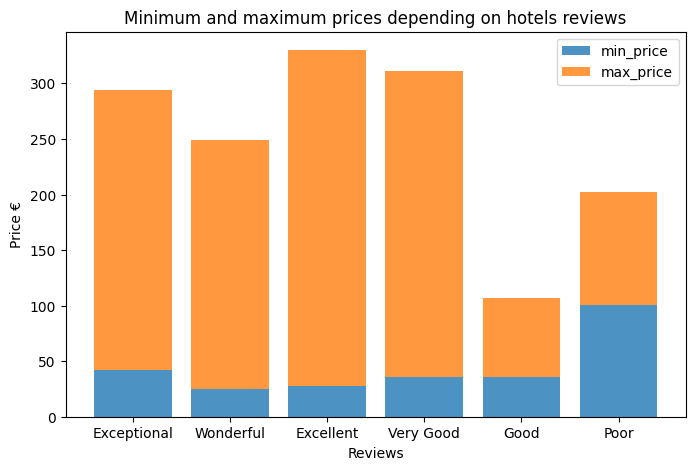

In [23]:
# Stacked bar chart for representing minimum and the maximum prices of the hotels with the same review score

fig, ax = plt.subplots(figsize=(8, 5))
bottom = np.zeros(len(reviews_prices['min_price']))
colors = ['#24b1d1', '#ae24d1']

for review_name, prices in reviews_prices.items():
    p = ax.bar(list(reviews_prices_keys), prices, label=review_name, bottom=bottom, alpha=0.8)
    bottom += prices

ax.set_title("Minimum and maximum prices depending on hotels reviews")
plt.ylabel('Price €')
plt.xlabel('Reviews')
ax.legend(loc="upper right")

plt.show()

### Simple plot

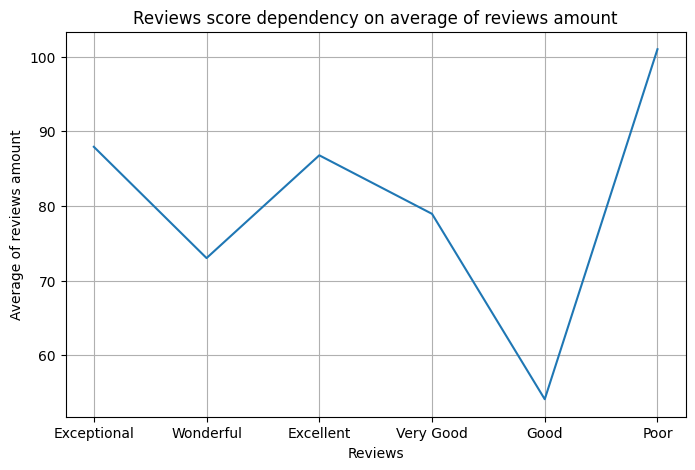

In [24]:
# Simple plot diagram for representing how the reviews score depends on the reviews amount

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(reviews_prices_keys,reviews_amount_average)

ax.set(xlabel='Reviews', ylabel='Average of reviews amount',
       title='Reviews score dependency on average of reviews amount')
ax.grid()

plt.show()

### Scatter plot

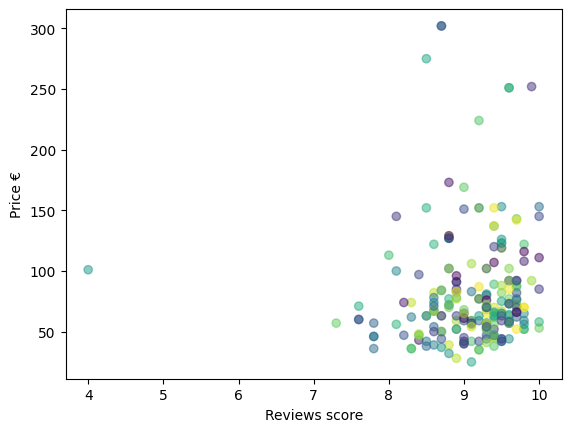

In [25]:
# Scatter plot diagram for representing how the price of a hotel room depends on the feedback score

x = data['score']
y = data['price(eur)']

colors = np.random.rand(len(data['score']))

plt.scatter(x, y, c=colors, alpha=0.5)

plt.xlabel('Reviews score')
plt.ylabel('Price €')

plt.show()

## Exporting data to local files

In [26]:
# Exporting data to JSON file
data.to_json(r'booking.json')

In [27]:
# Exporting data to CSV file
data.to_csv(r'booking.csv')

## Exporting data via MySQL into database

### Import libraries

In [28]:
from sqlalchemy import create_engine
import mysql.connector

### Establishing connections to mysql

In [29]:
cnx = mysql.connector.connect(user='root',
                              password='',
                              host='localhost',
                              database='booking')

In [30]:
# Creating a cursor object
cursor = cnx.cursor()

In [31]:
engine = create_engine("mysql+pymysql://" + "root" + ":" + "@" + "localhost" + "/" + "booking")

### Exporting dataframe to MySQL database

In [32]:
data.to_sql('hotels', engine, index=False, if_exists="replace")

221

In [33]:
# Adding ID column as a primary key
query = ('ALTER TABLE hotels ADD COLUMN `id` int(10) unsigned primary KEY AUTO_INCREMENT FIRST;')
cursor.execute(query)

In [34]:
# Commiting changes
cnx.commit()

### Closing connections

In [35]:
cursor.close()
cnx.close()